In [1]:
# Imports
import random
import string
import time
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
# Define a function which returns a random string of arbitrary length
def random_string(length):
    return ''.join(random.choices(string.ascii_lowercase,k=length))  

In [3]:
# Define a function which returns a string repeating the letter "a"
def single_letter_string(length):
    return 'a'*length

In [4]:
# Define a function which repeats a single letter except the first or last place
def two_letter_string(length,first=True):
    if length <= 1:
        return None
    else:
        if first:
            return 'b' + 'a'*(length-1)
        else:
            return 'a'*(length-1) + 'b'

In [5]:
# Print example 20-letter strings
print('Random: ' + random_string(20))
print('Single: ' + single_letter_string(20))
print('Single except first: ' + two_letter_string(20))
print('Single except last: ' + two_letter_string(20,first=False))

Random: drdyulyjptxmmtebfzou
Single: aaaaaaaaaaaaaaaaaaaa
Single except first: baaaaaaaaaaaaaaaaaaa
Single except last: aaaaaaaaaaaaaaaaaaab


In [6]:
def compare_string_experiment(s1,s2,k=10000):
    """ Time the comparison of two strings, return time per comparison in ns
    """
    start = time.perf_counter_ns()
    for ii in range(k):
        s1 == s2
    end = time.perf_counter_ns()
    
    return (end - start)/k

In [7]:
def compare_dict(s1, s2, k=10000):
    start = time.perf_counter_ns()
    sdict ={}
    sdict[s1] = 1
    for ii in range(k):
        try:
           check_collision = sdict.get(s2)
           if check_collision == 1:
               print("Fail")
        except:
            pass
    end = time.perf_counter_ns()

    return (end - start)/k

In [8]:
# Compare different cases
n_arr = np.arange(1000,100000,1000)
t_dict = np.zeros(n_arr.shape)      # Array of string lengths to test
t_ident = np.zeros(n_arr.shape)      # Time array for two identical strings
t_diffstart = np.zeros(n_arr.shape)  # Time array for strings where only first letter differs
t_diffend = np.zeros(n_arr.shape)    # Time array for strings where only first letter differs
t_random = np.zeros(n_arr.shape)     # Time array for two random strings

for i,n in enumerate(n_arr):  
    s_single1 = single_letter_string(n)               # n-length string with only the letter 'a'
    s_single2 = single_letter_string(n)               # n-length string with only the letter 'a'
    s_diffstart = two_letter_string(n)                # n-length string with first letter 'b', rest 'a'
    s_diffend = two_letter_string(n,first=False)      # n-length string with first letter 'a', rest 'b'
    s_random1 = random_string(n)                      # n-length string with random letters
    s_random2 = random_string(n)

                                   # n-length string with random letters

    t_dict[i] = compare_dict(s_single1, s_diffend)
    t_ident[i] = compare_string_experiment(s_single1,s_single2)
#    t_ident[i] = compare_string_experiment(s_single1,s_single1)
    t_diffstart[i] = compare_string_experiment(s_single1,s_diffstart)
    t_diffend[i] = compare_string_experiment(s_single1,s_diffend)
    t_random[i] = compare_string_experiment(s_random1,s_random2)


Text(0, 0.5, 'String comparison time [ns]')

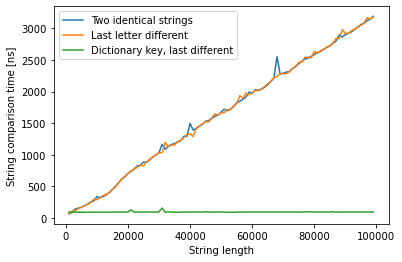

In [9]:
# Plot results
plt.plot(n_arr,t_ident,label = 'Two identical strings')
#plt.plot(n_arr,t_diffstart, label = 'First letter different')
plt.plot(n_arr,t_diffend, label = 'Last letter different')
#plt.plot(n_arr,t_random, label = 'Two random strings')
plt.plot(n_arr,t_dict, label = 'Dictionary key, last different')
plt.legend()
plt.xlabel('String length')
plt.ylabel('String comparison time [ns]')

In [10]:
n_arr

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
       28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000,
       37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000,
       46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000,
       55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000,
       64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000,
       73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000,
       82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000,
       91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000])

The results show that when the strings are identical (but still different objects), and when the last letter is different, comparison time increases approximately linearly with string length. When the first letter of the string is different, or when the two strings are random (almost all letters are different), comparison time appears to be approximately independent of string length. This indicates that the comparison starts at the beginning of the string and stops as soon as two different characters are found. 

# Exercise 2

In [11]:
# Define a function which generates an arbitrary-length random integer number
def random_number(n):
    digits = string.digits
    random_num_string = random.choices(digits[1:]) + random.choices(digits,k=(n-1))
    return int(''.join(random_num_string))

In [12]:
random_number(25)

3736325240158292216537359

In [13]:
n_arr = np.arange(100,10000,100)
t_arr = np.zeros(n_arr.shape)
k_repeat = 100

for i,n in enumerate(n_arr):
    num1 = random_number(n)
    num2 = random_number(n)
    
    start = time.perf_counter_ns()
    for j in range(k_repeat):
        num1*num2
        
    end = time.perf_counter_ns()
    t_arr[i] = (end - start)/k_repeat

Text(0, 0.5, 'Multiplication processing time [ns]')

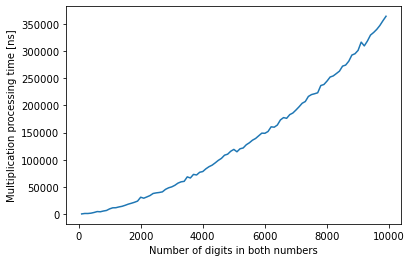

In [14]:
# Plot results of experiment
plt.plot(n_arr,t_arr)
plt.xlabel('Number of digits in both numbers')
plt.ylabel('Multiplication processing time [ns]')

Processing time increases with the number of digits. The increase is more than linear. O(n^2)? 